In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
import time
from citipy import citipy
from weatherfig import api_key

In [2]:
# Generating random latitudes and longitudes
lat = np.random.uniform(low=-90, high=90, size=2000)
lng = np.random.uniform(low=-180, high=180, size=2000)

# Creating coordinate pairs
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))

In [3]:
# Finding the cities nearest to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code

# Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

# Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,rikitea,pf
1,amapa,br
2,ituni,gy
3,mataura,pf
4,jamestown,sh


In [4]:
# Adding columns for values
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,,,,,,
1,amapa,br,,,,,,
2,ituni,gy,,,,,,
3,mataura,pf,,,,,,
4,jamestown,sh,,,,,,


In [9]:
# Accessing data
print("Beginning Data Retrieval")
print("---------------------------------")

# Limiting pull requests
start_time = time.time()

for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], 
                                                                                              row['Country Code'], api_key)
   
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = req.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
        
    # Pausing to limit pull requests
    if (index + 1) % 60 == 0:
        run_time = time.time() - start_time
        time.sleep(60 - run_time)
        start_time = time.time()
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

Beginning Data Retrieval
---------------------------------
Now retrieving City #0: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #1: amapa, br
http://api.openweathermap.org/data/2.5/weather?q=amapa,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #4: jamestown, sh
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #5: valparaiso, cl
http://api.openweathermap.org/data/2.5/weather?q=valparaiso,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #6: mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #7: pozega, hr
http://api.openweathermap.org/data/2.5/weather?q=pozega,hr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #8: salalah, 

Now retrieving City #62: hofn, is
http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #63: mar del plata, ar
http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #65: inhambane, mz
http://api.openweathermap.org/data/2.5/weather?q=inhambane,mz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #66: westport, ie
http://api.openweathermap.org/data/2.5/weather?q=westport,ie&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #67: mainit, ph
http://api.openweathermap.org/data/2.5/weather?q=mainit,ph&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #68: klaksvik, fo
http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #69: yerbogachen, ru
http://api.openweathermap.org/data/2.5/we

Now retrieving City #127: georgetown, sh
http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #128: broken hill, au
http://api.openweathermap.org/data/2.5/weather?q=broken hill,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #129: pavlysh, ua
http://api.openweathermap.org/data/2.5/weather?q=pavlysh,ua&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #130: tiznit, ma
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #131: tiksi, ru
http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #132: ixtapa, mx
http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #133: maniitsoq, gl
http://api.openweathermap.org/data/2.5/wea

Now retrieving City #186: pelotas, br
http://api.openweathermap.org/data/2.5/weather?q=pelotas,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #188: beloha, mg
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #189: port macquarie, au
http://api.openweathermap.org/data/2.5/weather?q=port macquarie,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #190: arman, ru
http://api.openweathermap.org/data/2.5/weather?q=arman,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #191: zaysan, kz
http://api.openweathermap.org/data/2.5/weather?q=zaysan,kz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #192: arlit, ne
http://api.openweathermap.org/data/2.5/weather?q=arlit,ne&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #193: taoudenni, ml
http://api.openweathermap.org/data/2.5/weather

Now retrieving City #246: clyde river, ca
http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #247: tototlan, mx
http://api.openweathermap.org/data/2.5/weather?q=tototlan,mx&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #249: sao felix do xingu, br
http://api.openweathermap.org/data/2.5/weather?q=sao felix do xingu,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #250: alofi, nu
http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #251: pozo colorado, py
http://api.openweathermap.org/data/2.5/weather?q=pozo colorado,py&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #252: nikolskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #253: sioux lookout, c

Now retrieving City #311: hasaki, jp
http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #314: vannes, fr
http://api.openweathermap.org/data/2.5/weather?q=vannes,fr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #315: yellowknife, ca
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #316: neryungri, ru
http://api.openweathermap.org/data/2.5/weather?q=neryungri,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #317: zapolyarnyy, ru
http://api.openweathermap.org/data/2.5/weather?q=zapolyarnyy,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #318: aripuana, br
http://api.openweathermap.org/data/2.5/weather?q=aripuana,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #319: kavieng, pg
http://api.openweathermap.org/da

Now retrieving City #372: saint-pierre, pm
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre,pm&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #373: kabalo, cd
http://api.openweathermap.org/data/2.5/weather?q=kabalo,cd&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #374: tadine, nc
http://api.openweathermap.org/data/2.5/weather?q=tadine,nc&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #375: constitucion, cl
http://api.openweathermap.org/data/2.5/weather?q=constitucion,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #376: new iberia, us
http://api.openweathermap.org/data/2.5/weather?q=new iberia,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #377: san vicente, cl
http://api.openweathermap.org/data/2.5/weather?q=san vicente,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #378: batemans bay, au
http://api.open

Now retrieving City #429: dicabisagan, ph
http://api.openweathermap.org/data/2.5/weather?q=dicabisagan,ph&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #430: emirdag, tr
http://api.openweathermap.org/data/2.5/weather?q=emirdag,tr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #432: bathsheba, bb
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #433: yulara, au
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #434: winnemucca, us
http://api.openweathermap.org/data/2.5/weather?q=winnemucca,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #435: berlevag, no
http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #436: thompson, ca
http://api.openweathermap.org/d

Now retrieving City #490: trincomalee, lk
http://api.openweathermap.org/data/2.5/weather?q=trincomalee,lk&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #491: ponta do sol, cv
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,cv&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #492: guider, cm
http://api.openweathermap.org/data/2.5/weather?q=guider,cm&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #493: maceio, br
http://api.openweathermap.org/data/2.5/weather?q=maceio,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #494: neuquen, ar
http://api.openweathermap.org/data/2.5/weather?q=neuquen,ar&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #495: manzil salim, tn
http://api.openweathermap.org/data/2.5/weather?q=manzil salim,tn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #496: carlyle, ca
http://api.openweathermap.

Now retrieving City #550: poum, nc
http://api.openweathermap.org/data/2.5/weather?q=poum,nc&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #551: atar, mr
http://api.openweathermap.org/data/2.5/weather?q=atar,mr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #552: senanga, zm
http://api.openweathermap.org/data/2.5/weather?q=senanga,zm&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #553: bom jesus, br
http://api.openweathermap.org/data/2.5/weather?q=bom jesus,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #554: pachino, it
http://api.openweathermap.org/data/2.5/weather?q=pachino,it&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #555: boende, cd
http://api.openweathermap.org/data/2.5/weather?q=boende,cd&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #556: gimli, ca
http://api.openweathermap.org/data/2.5/weather?q=gimli,ca&unit

Now retrieving City #612: snezhnogorsk, ru
http://api.openweathermap.org/data/2.5/weather?q=snezhnogorsk,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #613: carrickmacross, ie
http://api.openweathermap.org/data/2.5/weather?q=carrickmacross,ie&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #614: aginskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=aginskoye,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #615: kieta, pg
http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #617: coronado, us
http://api.openweathermap.org/data/2.5/weather?q=coronado,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #618: mus, tr
http://api.openweathermap.org/data/2.5/weather?q=mus,tr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #620: gazojak, tm
http://api.openweathermap.org/da

Now retrieving City #675: omagh, gb
http://api.openweathermap.org/data/2.5/weather?q=omagh,gb&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #676: petauke, zm
http://api.openweathermap.org/data/2.5/weather?q=petauke,zm&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #678: hualmay, pe
http://api.openweathermap.org/data/2.5/weather?q=hualmay,pe&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #679: benjamin constant, br
http://api.openweathermap.org/data/2.5/weather?q=benjamin constant,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #680: mumford, gh
http://api.openweathermap.org/data/2.5/weather?q=mumford,gh&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #681: cuiluan, cn
http://api.openweathermap.org/data/2.5/weather?q=cuiluan,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #682: nacala, mz
http://api.openweathermap.org/data/

Now retrieving City #734: toamasina, mg
http://api.openweathermap.org/data/2.5/weather?q=toamasina,mg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #735: sobolevo, ru
http://api.openweathermap.org/data/2.5/weather?q=sobolevo,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #737: saint-joseph, re
http://api.openweathermap.org/data/2.5/weather?q=saint-joseph,re&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #738: bhainsdehi, in
http://api.openweathermap.org/data/2.5/weather?q=bhainsdehi,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #739: opuwo, na
http://api.openweathermap.org/data/2.5/weather?q=opuwo,na&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #740: marsa matruh, eg
http://api.openweathermap.org/data/2.5/weather?q=marsa matruh,eg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #741: bondo, cd
http://api.openweatherma

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,-23.12,-134.97,72.03,100.0,44.0,7.74
1,amapa,br,-1.83,-56.23,79.41,80.0,48.0,4.27
4,jamestown,sh,-15.94,-5.72,70.95,100.0,64.0,15.12
5,valparaiso,cl,-33.04,-71.63,52.29,66.0,0.0,12.75
6,mahebourg,mu,-20.41,57.7,71.60,94.0,75.0,5.28


In [ ]:
# Exporting DataFrame
cities_df.to_csv("Output/weather_info.csv")

# Latitude vs. Temperature Plot 

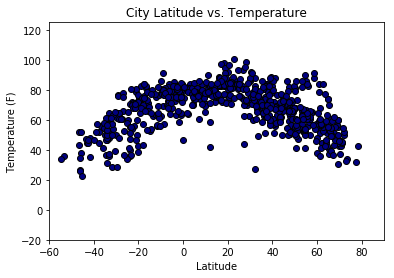

In [6]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature (F)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

plt.savefig("Images/LatitudeVsTemperature.png")
plt.show()